<a href="https://colab.research.google.com/github/lwehausen/Simulation/blob/main/Root_Finding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#To run R in Google Colab:
%load_ext rpy2.ipython

#Root Finding

In [ ]:
%%R
install.packages("spuRs", repos =  "http://cran.us.r-project.org")
install.packages("mvtnorm", repos =  "http://cran.us.r-project.org")

In [ ]:
%%R
library(ggplot2)
library(dplyr)
library(mvtnorm)

1. Write your own code to implement the secant method for root finding, and then use this find all of the roots of the following functions:

$(a)$. $f(x) = e^{−x^3} − \frac{1}{2}$

[1] 0.884997


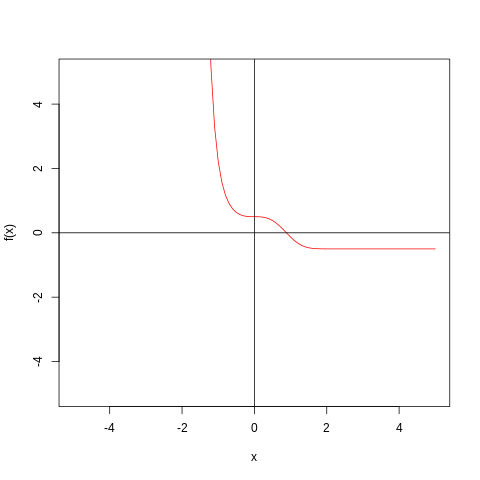

In [26]:
%%R
f <- function(x) {
  exp((-x)^3) - (1/2)
}

#plot the function to see where it crosses the x-axis so I don't have to repeatedly test different intervals; "curve" is for plotting functions, found on stackexchange
curve(f, col = "red", xlim=c(-5,5), ylim=c(-5,5), ylab="f(x)")
abline(h=0)
abline(v=0) #appears that root is somewhere in [0,2]

#write function for secant method
secant <- function(f, x0, x1, eps = 1e-10, n = 1000) {
  for (i in 1:n) {
    x2 <- x1 - f(x1) *  ((x1-x0)/(f(x1)-f(x0)))
    if (abs(x2-x1) < eps) {
      return(x2)
    }
    x0 <- x1
    x1 <- x2
    }
}
secant(f,0,2)

In [27]:
%%R
secant2 <- function(f, x0, x1, eps = 1e-10, n = 1000) {
  for (i in 1:n) {
    x2 <- x1 - f(x1) *  ((x1-x0)/(f(x1)-f(x0)))
    if (abs(x2-x1) < eps) {
      return(x2)
    }
    x0 <- x1
    x1 <- x2
    }
}
secant2(f,0,2)

[1] 0.884997


The root is at $x = 0.884997$.

$(b)$. $f(x) = x^{−1/2} \cdot |\sin (x)| − \frac{1}{2}$

[1] 2.284761


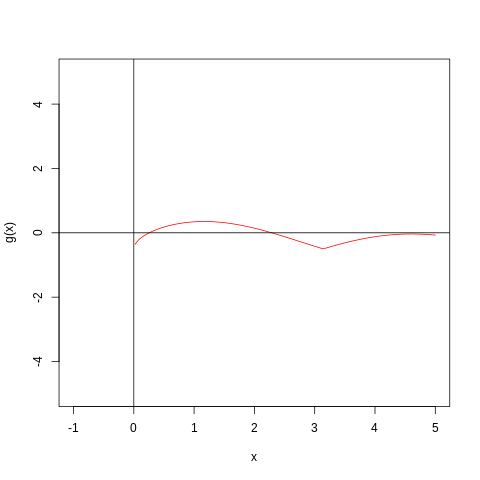

In [28]:
%%R
g <- function(x) {
  x^(-1/2) * abs(sin(x)) - (1/2)
}

#create function plot
curve(g, col = "red", xlim=c(-1,5), ylim=c(-5,5), ylab="g(x)")
abline(h=0)
abline(v=0)

#this function does not actually equal 0, so I must find the leftmost x-value of this function, which happens to be a local minimum, as seen on the graph. I can find this minimum value
mymin = optimize(g, interval = c(0,1))
x_min = mymin$min
y_min = mymin$minval
#we only care about the x-value to use as the starting point of our interval
#x_min = 6.610696e-05 is the leftmost x-value

In [30]:
%%R
secant(g,6.610696e-05,0.5)

[1] 0.2555123


In [31]:
%%R
#from the graph we know there is one more root to find
secant(g,2,2.5)

[1] 2.284761


The first root is at $x = 0.2555123$ and the second root is at $x = 2.284761$.

2. Write a function of $b$ to evaluate the following integral: \\
$\int_{0}^{2\pi} \sin(\frac{x}{b}) dx$. \\
Then take this function, $f(b)$ and find the value of $b$ that makes $f(b)= 1$ using a root finding algorithm.

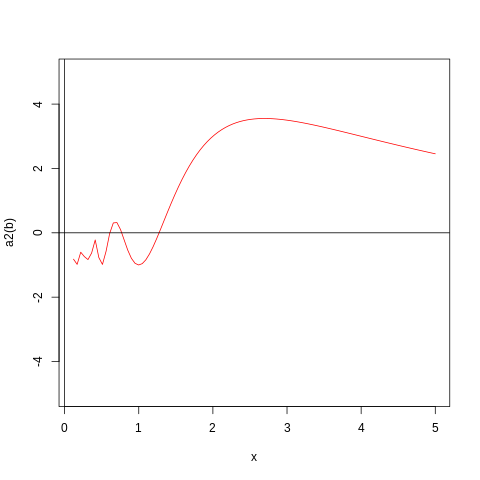

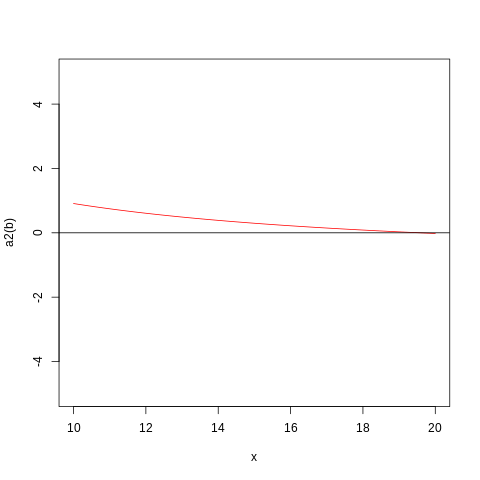

In [33]:
%%R
#function to evaluate integral; took anti-derivative calculus way; anti-derivative = -b*cos(x/b)
#plug in 2*pi and 0 for x and obtain a function of b only
antifunc5 <- function(b) {b-b*cos((2*pi)/b)}

a2 <- function(b) {
  b-b*cos((2*pi)/b) - 1
}

#plot the function to see where it crosses the x-axis
curve(a2, col = "red", xlim=c(0.12,5), ylim=c(-5,5), ylab="a2(b)")
abline(h=0)
abline(v=0)

curve(a2, col = "red", xlim=c(10,20), ylim=c(-5,5), ylab="a2(b)")
abline(h=0)
abline(v=0)
#there are 4 roots

In [34]:
%%R
#write function for secant method
secant <- function(a2, b0, b1, eps = 1e-10, n = 1000) {
  for (i in 1:n) {
    b2 <- b1 - a2(b1) / ((a2(b1)-a2(b0)) / (b1-b0))
    if (abs(b2-b1) < eps) {
      return(b2)
    }
    b0 <- b1
    b1 <- b2
    }
}

secant(a2,0.15,0.7) #root is at b = 0.6099203

[1] 19.57023


In [35]:
%%R
secant(a2,0.7,1) #root is at b = 0.7703022

[1] 0.7703022


In [36]:
%%R
secant(a2,1,2) #root is at b = 1.274601

[1] 1.274601


In [37]:
%%R
secant(a2,18,20) #root is at b = 19.57023

[1] 19.57023


3. Use fixedpoint to find the fixed point of $\cos x$. Start with $x_0 = 0$ as your initial guess (the answer is $0.73908513$).

In [23]:
%%R
fixedpoint <- function(ftn, x0, tol = 1e-9, max.iter = 100) {
  # do first iteration
xold <- x0
xnew <- ftn(xold)
iter <- 1
cat("At iteration 1 value of x is:", xnew, "\n")

# continue iterating until stopping conditions are met
while ((abs(xnew-xold) > tol) && (iter < max.iter)) {
xold <- xnew;
xnew <- ftn(xold);
iter <- iter + 1
cat("At iteration", iter, "value of x is:", xnew, "\n")
}
# output depends on success of algorithm
if (abs(xnew-xold) > tol) {
cat("Algorithm failed to converge\n")
return(NULL)
} else {
cat("Algorithm converged\n")
return(xnew)
}
}

ftn1 <- function(x) return(cos(x))
fixedpoint(ftn1, 0, tol = 1e-06)

At iteration 1 value of x is: 1 
At iteration 2 value of x is: 0.5403023 
At iteration 3 value of x is: 0.8575532 
At iteration 4 value of x is: 0.6542898 
At iteration 5 value of x is: 0.7934804 
At iteration 6 value of x is: 0.7013688 
At iteration 7 value of x is: 0.7639597 
At iteration 8 value of x is: 0.7221024 
At iteration 9 value of x is: 0.7504178 
At iteration 10 value of x is: 0.731404 
At iteration 11 value of x is: 0.7442374 
At iteration 12 value of x is: 0.7356047 
At iteration 13 value of x is: 0.7414251 
At iteration 14 value of x is: 0.7375069 
At iteration 15 value of x is: 0.7401473 
At iteration 16 value of x is: 0.7383692 
At iteration 17 value of x is: 0.7395672 
At iteration 18 value of x is: 0.7387603 
At iteration 19 value of x is: 0.7393039 
At iteration 20 value of x is: 0.7389378 
At iteration 21 value of x is: 0.7391844 
At iteration 22 value of x is: 0.7390183 
At iteration 23 value of x is: 0.7391302 
At iteration 24 value of x is: 0.7390548 
At iterati

Now use newton raphson to find the root of $\cos x − x$, starting with $x_0 = 0$ as your initial guess. Is it faster than the fixed-point method?

In [9]:
%%R
newtonraphson <- function(ftn, x0, tol = 1e-9, max.iter = 100) {
  # initialise
x <- x0
fx <- ftn(x)
iter <- 0
# continue iterating until stopping conditions are met
while ((abs(fx[1]) > tol) && (iter < max.iter)) {
x <- x - fx[1]/fx[2]
fx <- ftn(x)
iter <- iter + 1
cat("At iteration", iter, "value of x is:", x, "\n")
}
# output depends on success of algorithm
if (abs(fx[1]) > tol) {
cat("Algorithm failed to converge\n")
return(NULL)
} else {
cat("Algorithm converged\n")
return(x)
}
}

ftn2 <- function(x) {
 fx <- cos(x) - x
 dfx <- -sin(x) - 1
 return(c(fx, dfx))
 }
newtonraphson(ftn2, 0, 1e-06)

At iteration 1 value of x is: 1 
At iteration 2 value of x is: 0.7503639 
At iteration 3 value of x is: 0.7391129 
At iteration 4 value of x is: 0.7390851 
Algorithm converged
[1] 0.7390851


Yes, Newton Raphson (4 iterations) is faster than Fixed Point Iteration (35 iterations)!

4. For $f : \mathbb{R} → \mathbb{R}$, the Newton-Raphson algorithm uses a sequence of linear
approximations of $f$ to find a root. What happens if we use quadratic approximations instead?
Suppose that $x_n$ is our current approximation to $f$, then a quadratic approximation to $f$ at $x_n$ is given by the second-order Taylor expansion:
$f(x) ≈ g_n(x) = f(x_n) + (x − x_n)f′(x_n) + \frac{1}{2}(x − x_n)^2f′′(x_n)$. \\
Let $x_{n+1}$ be the solution of $g_n(x) = 0$ that is closest to $x_n$, assuming a solution exists. If $g_n(x) = 0$ has no solution, then let $x_n+1$ be the point at which $g_n$ attains either its minimum or maximum. \\
Implement this algorithm in R and use it to find the fixed points of the
following functions:

$(a)$. $\cos(x) − x$ using $x_0 = 1, 3, 6$.

In [17]:
%%R
newtonraphson_quad <- function(ftn, x0, tol = 1e-9, max.iter = 100) {
  # initialise
  x <- x0
  fx <- ftn(x)
  iter <- 0
  # continue iterating until stopping conditions are met
  while ((abs(fx[1]) > tol) && (iter < max.iter)) {
    vertex = (x*fx[3]-fx[2])/fx[3]
    disc = (-x*fx[3] + fx[2])^2 - 4*((1/2)*fx[3]*(fx[1] - x*fx[2] + (1/2)*x^2 * fx[3]))
    if (disc < 0) {
      x <- vertex
    } else if (x > vertex) {
      x <- vertex + abs(sqrt(disc)/fx[3])
    } else {
      x <- vertex - abs(sqrt(disc)/fx[3])
    }
  fx <- ftn(x)
  iter <- iter + 1
  cat("At iteration", iter, "value of x is:", x, "\n")
  }

  # output depends on success of algorithm
  if (abs(fx[1]) > tol) {
    cat("Algorithm failed to converge.\n Extrema point obtained")
    return(NULL)
  } else {
  cat("Algorithm converged\n")
  return(x)
  }
}


ftn3 <- function(x) {
 fx <- cos(x) - 2*x
 dfx <- -sin(x) - 2
 dfx2 <- -cos(x)
 return(c(fx, dfx, dfx2))
}

newtonraphson_quad(ftn3, 1, 1e-06)
newtonraphson_quad(ftn3, 3, 1e-06)
newtonraphson_quad(ftn3, 6, 1e-06)

At iteration 1 value of x is: 0.4583998 
At iteration 2 value of x is: 0.4501836 
Algorithm converged
At iteration 1 value of x is: 0.8269996 
At iteration 2 value of x is: 0.4525812 
At iteration 3 value of x is: 0.4501836 
Algorithm converged
At iteration 1 value of x is: 4.208042 
At iteration 2 value of x is: 0.03528846 
At iteration 3 value of x is: 0.4495128 
At iteration 4 value of x is: 0.4501836 
Algorithm converged
[1] 0.4501836


In [16]:
%%R
#Compare to newton raphson:
newtonraphson(ftn3, 1, 1e-06)
newtonraphson(ftn3, 3, 1e-06)
newtonraphson(ftn3, 6, 1e-06)

At iteration 1 value of x is: 0.486288 
At iteration 2 value of x is: 0.4504186 
At iteration 3 value of x is: 0.4501836 
Algorithm converged
At iteration 1 value of x is: -0.264643 
At iteration 2 value of x is: 0.595022 
At iteration 3 value of x is: 0.4536808 
At iteration 4 value of x is: 0.4501859 
At iteration 5 value of x is: 0.4501836 
Algorithm converged
At iteration 1 value of x is: -0.4163252 
At iteration 2 value of x is: 0.6787075 
At iteration 3 value of x is: 0.4583585 
At iteration 4 value of x is: 0.4501959 
At iteration 5 value of x is: 0.4501836 
Algorithm converged
[1] 0.4501836


$(d)$. $x^3 − 7x^2 + 14x − 8$ using $x_0 = 1.1, 1.2, . . ., 1.9$.

In [13]:
%%R
ftn4 <- function(x) {
 fx <- x^3 - 7*x^2 + 14*x - 8
 dfx <- 3*x^2 - 14*x + 14
 dfx2 <- 6*x - 14
 return(c(fx, dfx, dfx2))
}

newtonraphson_quad(ftn4, 1.1, 1e-06)
newtonraphson_quad(ftn4, 1.2, 1e-06)
newtonraphson_quad(ftn4, 1.3, 1e-06)
newtonraphson_quad(ftn4, 1.4, 1e-06)
newtonraphson_quad(ftn4, 1.5, 1e-06)
newtonraphson_quad(ftn4, 1.6, 1e-06)
newtonraphson_quad(ftn4, 1.7, 1e-06)
newtonraphson_quad(ftn4, 1.8, 1e-06)
newtonraphson_quad(ftn4, 1.9, 1e-06)

At iteration 1 value of x is: 0.9996634 
At iteration 2 value of x is: 1 
Algorithm converged
[1] 1


In [19]:
%%R
newtonraphson(ftn4, 1.1, 1e-06)
newtonraphson(ftn4, 1.2, 1e-06)
newtonraphson(ftn4, 1.3, 1e-06)
newtonraphson(ftn4, 1.4, 1e-06)
newtonraphson(ftn4, 1.5, 1e-06)
newtonraphson(ftn4, 1.6, 1e-06)
newtonraphson(ftn4, 1.7, 1e-06)
newtonraphson(ftn4, 1.8, 1e-06)
newtonraphson(ftn4, 1.9, 1e-06)

At iteration 1 value of x is: 0.9829596 
At iteration 2 value of x is: 0.9996266 
At iteration 3 value of x is: 0.9999998 
Algorithm converged
At iteration 1 value of x is: 0.9052632 
At iteration 2 value of x is: 0.9900654 
At iteration 3 value of x is: 0.9998712 
At iteration 4 value of x is: 1 
Algorithm converged
At iteration 1 value of x is: 0.6482759 
At iteration 2 value of x is: 0.9059224 
At iteration 3 value of x is: 0.9901916 
At iteration 4 value of x is: 0.9998744 
At iteration 5 value of x is: 1 
Algorithm converged
At iteration 1 value of x is: -0.8285714 
At iteration 2 value of x is: 0.07435419 
At iteration 3 value of x is: 0.6136214 
At iteration 4 value of x is: 0.891034 
At iteration 5 value of x is: 0.9871826 
At iteration 6 value of x is: 0.9997869 
At iteration 7 value of x is: 0.9999999 
Algorithm converged
At iteration 1 value of x is: 4 
Algorithm converged
At iteration 1 value of x is: 2.4 
At iteration 2 value of x is: 2.013793 
At iteration 3 value of x is

5. How do we know $\pi = 3.1415926$ (to 7 decimal places)? One way of finding $\pi$ is to solve $\sin(x) = 0$. By definition the solutions to $\sin(x) = 0$ are $k\pi$ for $k = 0, ±1, ±2, . . .$, so the root closest to $3$ should be $\pi$.

$(a)$. Use a root-finding algorithm, such as the Newton-Raphson algorithm, to find the root of $\sin(x)$ near $3$. How close can you get to $\pi$?

In [20]:
%%R
ftn5 <- function(x) {
 fx <- sin(x)
 dfx <- cos(x)
 return(c(fx, dfx))
}

newtonraphson(ftn5, 3.14, 1e-10)

At iteration 1 value of x is: 3.141593 
At iteration 2 value of x is: 3.141593 
Algorithm converged
[1] 3.141593


$(b)$. Put \\
$f_n(x) = \sum_{k=0}^n (-1)^k \frac{x^{2k+1}}{(2k+1)!}$

Write a function in R to calculate $f_n(x)$. Plot $f_n(x)$ over the range $[0, 7]$
for a number of values of $n$, and verify that it looks like $\sin(x)$ for large $n$.

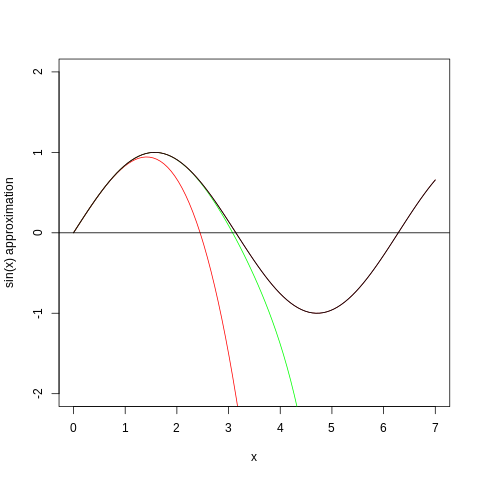

In [21]:
%%R
sinfunc <- function(n) {
  result <- function(x) {
    k = 0:n
    sum(((-1)^k*x^(2*k + 1))/factorial(2*k + 1))
  }
  return(result)
}

#plot my function and the sin function
curve(Vectorize(sinfunc(1))(x), col = "red", xlim=c(0,7), ylim=c(-2,2), ylab="sin(x) approximation")
curve(Vectorize(sinfunc(3))(x), col = "green", add = TRUE)
curve(sin, col = "pink", add = TRUE)
curve(Vectorize(sinfunc(10))(x), col = "brown", add = TRUE)
curve(Vectorize(sinfunc(20))(x), col = "black", add = TRUE)
abline(h=0)

The approximation for $n = 20$ completely covers the actual $\sin$ function, which is plotted with a pink curve. This approximation is very good then.

$(c)$. Choose a large value of $n$, then find an approximation to $\pi$ by solving $f_n(x) = 0$ near $3$. Can you get an approximation that is correct up to 6 decimal places? Can you think of a better way of calculating $\pi$?

In [24]:
%%R
fixedpoint(function(x) sinfunc(200) (x) + x, 3.14, 1e-10)

At iteration 1 value of x is: 3.141593 
At iteration 2 value of x is: 3.141593 
At iteration 3 value of x is: 3.141593 
Algorithm converged
[1] 3.141593


No, I can get it to 5 values though.

6. Use the Newton-Raphson algorithm to find the roots of the following function (there are 3 roots: $f(x) = x^3 − 1957x^2 + 1187296x − 210305472$

At iteration 1 value of x is: 311.4684 
At iteration 2 value of x is: 311.9989 
At iteration 3 value of x is: 312 
At iteration 4 value of x is: 312 
Algorithm converged
At iteration 1 value of x is: 771.9589 
At iteration 2 value of x is: 772.9916 
At iteration 3 value of x is: 773 
At iteration 4 value of x is: 773 
Algorithm converged
At iteration 1 value of x is: 874.2828 
At iteration 2 value of x is: 872.0591 
At iteration 3 value of x is: 872 
At iteration 4 value of x is: 872 
At iteration 5 value of x is: 872 
Algorithm converged
[1] 872


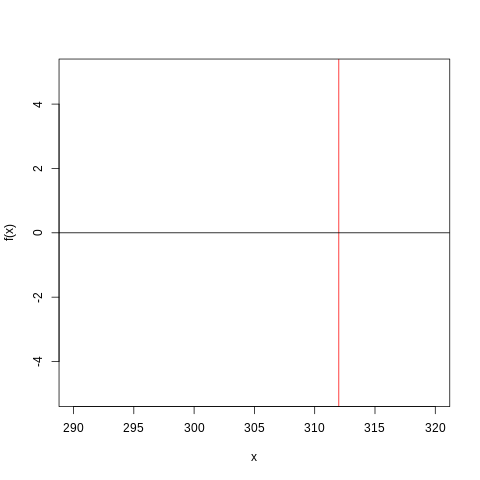

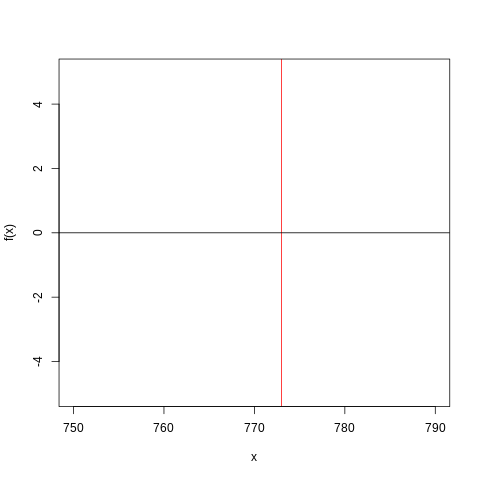

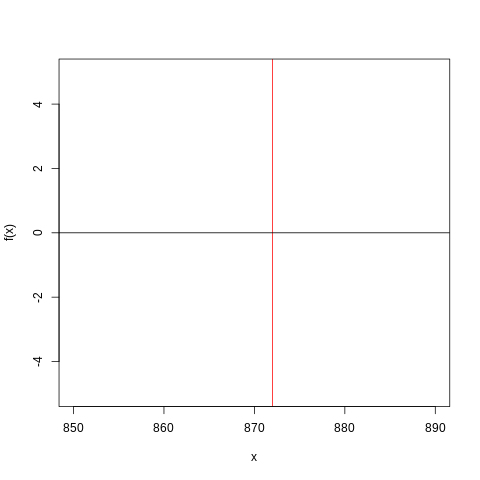

In [25]:
%%R
ftn7 <- function(x) {
 fx <- x^3 - 1957*x^2 + 1187296*x - 210305472
 dfx <- 3*x^2 - 3914*x + 1187296
 return(c(fx, dfx))
}

#write f(x) as a function that is plottable to help find roots visually.
g <- function(x) {
  fx <- x^3 - 1957*x^2 + 1187296*x - 210305472
}

#plot the function to see where it crosses the x-axis
curve(g, col = "red", xlim=c(290,320), ylim=c(-5,5), ylab="f(x)")
abline(h=0)
abline(v=0)

curve(g, col = "red", xlim=c(750,790), ylim=c(-5,5), ylab="f(x)")
abline(h=0)
abline(v=0)

curve(g, col = "red", xlim=c(850,890), ylim=c(-5,5), ylab="f(x)")
abline(h=0)
abline(v=0)

newtonraphson(ftn7, 300, 1e-06)
newtonraphson(ftn7, 760, 1e-06)
newtonraphson(ftn7, 860, 1e-06)